In [8]:
import pandas as pd

# Зчитування даних
file_path = 'C:/Users/Dariia/Documents/abtest/ab_test_data.csv'
df = pd.read_csv(file_path)

# Перегляд структури
print(df.head())
print(df.info())

# Перетворення колонки timestamp у datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

                                user_id                   timestamp  \
0  7f6833e6-1141-4f20-b4b2-f1e31019b1fd  2023-07-04 04:40:55.848109   
1  e6a6e960-d3f3-4074-a516-ba1e609b211e  2023-07-06 00:26:45.486187   
2  4d3fbfa5-6847-410a-bac2-477f01d5f400  2023-07-10 20:24:33.639464   
3  361457d9-a044-48f7-981c-d67dc3861679  2023-07-20 07:04:49.957013   
4  285cd63d-7d03-427f-a062-1fa2dd2e77d6  2023-07-19 23:27:50.116680   

  test_group  conversion  
0          a           0  
1          b           0  
2          b           0  
3          b           0  
4          b           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB
None


In [10]:
# Кількість користувачів у кожній групі
group_counts = df['test_group'].value_counts()
print("Кількість користувачів у групах:\n", group_counts)

# Кількість конверсій у кожній групі
conversions = df[df['conversion'] == 1]['test_group'].value_counts()
print("Кількість конверсій:\n", conversions)

# Рівень конверсії
conversion_rate = df.groupby('test_group')['conversion'].mean()
print("Рівень конверсії:\n", conversion_rate)

# Дата початку, кінця та тривалість
start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
duration_days = (end_date - start_date).days
print(f"Тест тривав з {start_date} по {end_date}, загалом {duration_days} днів")


Кількість користувачів у групах:
 test_group
a    10013
b     9985
Name: count, dtype: int64
Кількість конверсій:
 test_group
b    889
a    611
Name: count, dtype: int64
Рівень конверсії:
 test_group
a    0.061021
b    0.089034
Name: conversion, dtype: float64
Тест тривав з 2023-07-03 по 2023-07-25, загалом 22 днів


In [11]:
from scipy.stats import chi2_contingency

# Побудова таблиці спряженості
contingency = pd.crosstab(df['test_group'], df['conversion'])

# Статистичний тест
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("Результат статистично значущий. Відхиляємо нульову гіпотезу.")
else:
    print("Немає статистично значущої різниці.")


Chi2 = 56.1425, p-value = 0.0000
Результат статистично значущий. Відхиляємо нульову гіпотезу.


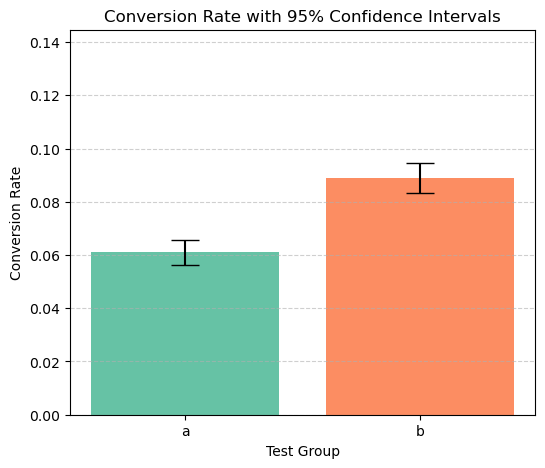

In [13]:
import matplotlib.pyplot as plt

# Дані
group_names = ci_data['test_group']
means = ci_data['mean']
errors = ci_data['mean'] - ci_data['ci_low']  # або: (ci_high - mean), обидва варіанти рівнозначні

# Побудова графіка
plt.figure(figsize=(6, 5))
plt.bar(group_names, means, yerr=errors, capsize=10, color=['#66c2a5', '#fc8d62'])
plt.title('Conversion Rate with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, max(ci_data['ci_high']) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


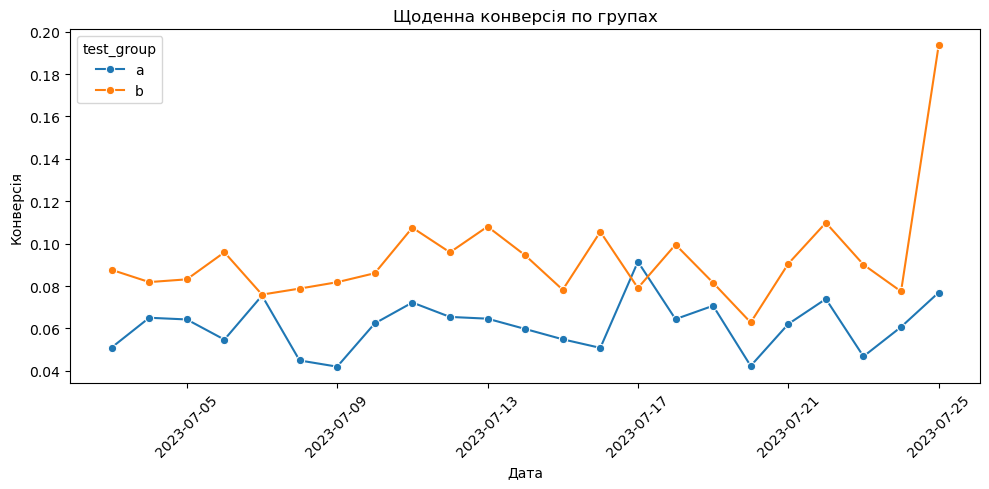

In [14]:
# Конверсія в часі (щодня)
df['date'] = df['timestamp'].dt.date
daily_conversion = df.groupby(['date', 'test_group'])['conversion'].mean().reset_index()

# Графік
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_conversion, x='date', y='conversion', hue='test_group', marker='o')
plt.title('Щоденна конверсія по групах')
plt.xlabel('Дата')
plt.ylabel('Конверсія')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
